In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names[:]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
columns=iris.feature_names[:]
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
names=iris.target_names[:]
names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [45]:
df=pd.DataFrame(columns)
df

,0
0,sepal length (cm)
1,sepal width (cm)
2,petal length (cm)
3,petal width (cm)


In [46]:
df=df.T
df

,0,1,2,3
0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


In [50]:
df.head()

,0,1,2,3
0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


In [63]:
df.columns = df.iloc[0]  ## Example 1: Assign row as column headers

In [64]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


In [65]:
df2 = df.rename(columns=df.iloc[0])  # Example 2: Using DataFrame.rename()

In [66]:
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


In [67]:
# Example 3: Convert row to header and remove the row
df2 = df.rename(columns=df.iloc[0]).loc[1:]

In [68]:
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


In [73]:
df2['class']='nan'
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,NaN,NaN,NaN,NaN,nan
1,NaN,NaN,NaN,NaN,nan
2,NaN,NaN,NaN,NaN,nan


In [83]:
df4=pd.DataFrame(iris.target_names)
df4

,0
0,setosa
1,versicolor
2,virginica


In [98]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [99]:
data1.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,5.006,3.428,1.462,0.246
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


In [93]:
iris.target_names[0]

'setosa'

In [94]:
iris.target_names[1]

'versicolor'

In [95]:
iris.target_names[2]

'virginica'

In [100]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [103]:
x=data1.drop(['target'],axis=1)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [105]:
y=data1.target
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [117]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [118]:
lr.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
y_predict=lr.predict(x_test)

In [120]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [121]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[29,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]], dtype=int64)

<Axes: >

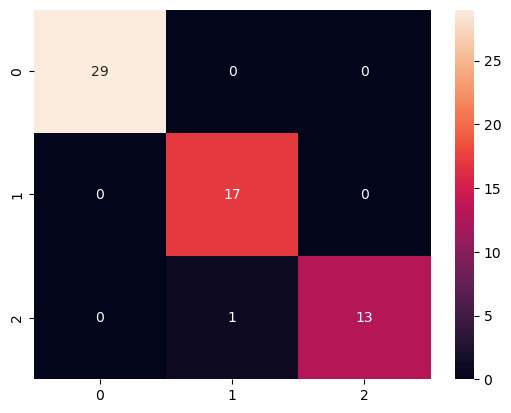

In [122]:
sn.heatmap(cm,annot=True)

In [123]:
lr.score(x_test,y_test)

0.9833333333333333

In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [125]:
lr.fit(x_train,y_train)

LogisticRegression()

In [126]:
y_predict=lr.predict(x_test)

In [127]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 18]], dtype=int64)

<Axes: >

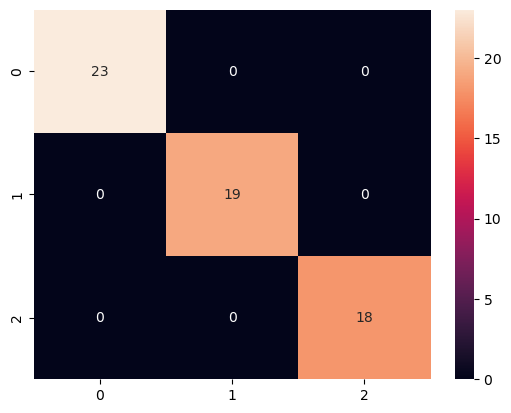

In [128]:
sn.heatmap(cm,annot=True)

In [129]:
lr.score(x_test,y_test)

1.0

In [130]:
data1.to_csv("iris.csv",index=False)